In [23]:
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sn

In [24]:
df = pd.read_csv("CPET_ProcessedData.csv")
df

,SessionId,PatientId,sex,age,BMI,MaxVO2_EST,MaxO2_EST,PredictedMaxHR,CardiacLim,PulmonaryLim,...,75_to_100_VESlope,75_to_100_RERSlope,75_to_100_RRSlope,75_to_100_O2Slope,75_to_100_VEVCO2Slope,75_to_100_VEVO2Slope,VTTime,VO2atVT,PercentTimeAfterVT,VO2vsPeakVO2atVT
0,7.0,7,F,40,35.915381,2.319521,0.010556,180.0,1,0,...,5.154882,0.063604,2.407089,0.315476,-0.153480,1.433403,14.5,1.649219,0.935484,0.711017
1,8.0,8,M,69,35.057157,2.657210,0.013601,159.7,1,0,...,8.354307,0.072662,2.197299,0.002014,1.749612,4.111349,11.5,1.384651,0.884615,0.521092
2,9.0,9,F,16,19.135218,1.444581,0.010300,196.8,0,0,...,9.395010,0.067916,3.033109,0.419901,-0.109887,1.682275,13.0,2.935024,0.866667,2.031748
3,10.0,10,M,17,19.358400,2.293821,0.015833,196.1,0,0,...,12.969552,0.043825,1.991049,0.827986,-0.355533,1.043862,12.0,3.601732,0.774194,1.570189
4,11.0,11,F,15,20.582507,1.933529,0.010300,197.5,0,0,...,0.925781,0.039283,5.233381,-0.530085,-0.220191,0.907466,7.5,2.695731,0.681818,1.394202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,227.0,227,M,55,32.647091,2.664873,0.014567,169.5,0,0,...,-3.645716,0.004893,-0.044359,-0.464362,-2.094273,-1.425434,-1.0,-1.000000,0.000000,-0.375252
213,228.0,228,M,66,30.834801,2.371165,0.013601,161.8,0,0,...,7.538376,0.114840,4.819715,0.711698,-2.841259,1.935547,-1.0,-1.000000,0.000000,-0.421734
214,229.0,229,F,65,36.729098,1.901766,0.010926,162.5,0,0,...,3.617017,0.020187,1.792170,0.469709,-0.337686,0.277564,10.5,1.173651,0.750000,0.617137
215,230.0,230,M,83,21.075915,1.736197,0.014301,149.9,0,0,...,1.376028,0.053272,0.715205,-0.279434,-0.881182,1.345763,-1.0,-1.000000,0.000000,-0.575971


In [25]:
# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [26]:
# Labelling

# Collapsing dummy variables into 'diagnosis'
df.loc[df['CardiacLim'] == 1, 'Class'] = 'CardiacLim'
df.loc[df['PulmonaryLim'] == 1, 'Class'] = 'PulmonaryLim'
df.loc[df['MuscleSkeletalLim'] == 1, 'Class'] = 'MuscleSkeletalLim'
df.loc[df['Healthy'] == 1, 'Class'] = 'Healthy'

# moving diagnosis into first column
first_column = df.pop('Class')

df.insert(0, 'Class', first_column)
df

,Class,SessionId,PatientId,sex,age,BMI,MaxVO2_EST,MaxO2_EST,PredictedMaxHR,CardiacLim,...,75_to_100_VESlope,75_to_100_RERSlope,75_to_100_RRSlope,75_to_100_O2Slope,75_to_100_VEVCO2Slope,75_to_100_VEVO2Slope,VTTime,VO2atVT,PercentTimeAfterVT,VO2vsPeakVO2atVT
0,CardiacLim,7.0,7,F,40,35.915381,2.319521,0.010556,180.0,1,...,5.154882,0.063604,2.407089,0.315476,-0.153480,1.433403,14.5,1.649219,0.935484,0.711017
1,CardiacLim,8.0,8,M,69,35.057157,2.657210,0.013601,159.7,1,...,8.354307,0.072662,2.197299,0.002014,1.749612,4.111349,11.5,1.384651,0.884615,0.521092
2,Healthy,9.0,9,F,16,19.135218,1.444581,0.010300,196.8,0,...,9.395010,0.067916,3.033109,0.419901,-0.109887,1.682275,13.0,2.935024,0.866667,2.031748
3,Healthy,10.0,10,M,17,19.358400,2.293821,0.015833,196.1,0,...,12.969552,0.043825,1.991049,0.827986,-0.355533,1.043862,12.0,3.601732,0.774194,1.570189
4,Healthy,11.0,11,F,15,20.582507,1.933529,0.010300,197.5,0,...,0.925781,0.039283,5.233381,-0.530085,-0.220191,0.907466,7.5,2.695731,0.681818,1.394202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,MuscleSkeletalLim,227.0,227,M,55,32.647091,2.664873,0.014567,169.5,0,...,-3.645716,0.004893,-0.044359,-0.464362,-2.094273,-1.425434,-1.0,-1.000000,0.000000,-0.375252
213,MuscleSkeletalLim,228.0,228,M,66,30.834801,2.371165,0.013601,161.8,0,...,7.538376,0.114840,4.819715,0.711698,-2.841259,1.935547,-1.0,-1.000000,0.000000,-0.421734
214,MuscleSkeletalLim,229.0,229,F,65,36.729098,1.901766,0.010926,162.5,0,...,3.617017,0.020187,1.792170,0.469709,-0.337686,0.277564,10.5,1.173651,0.750000,0.617137
215,MuscleSkeletalLim,230.0,230,M,83,21.075915,1.736197,0.014301,149.9,0,...,1.376028,0.053272,0.715205,-0.279434,-0.881182,1.345763,-1.0,-1.000000,0.000000,-0.575971


In [27]:
# Feature Selection

# Removing dummy variables
df = df.drop('CardiacLim', axis=1)
df = df.drop('PulmonaryLim', axis=1)
df = df.drop('MuscleSkeletalLim', axis=1)
df = df.drop('Healthy', axis=1)

# Removing IDs
df = df.drop('SessionId', axis=1)
df = df.drop('PatientId', axis=1)

In [28]:
# Summary

df.describe()

,age,BMI,MaxVO2_EST,MaxO2_EST,PredictedMaxHR,PeakHeartRate,MeanHeartRate,MinHeartRate,StdHeartRate,LowestVE/VCO2,...,75_to_100_VESlope,75_to_100_RERSlope,75_to_100_RRSlope,75_to_100_O2Slope,75_to_100_VEVCO2Slope,75_to_100_VEVO2Slope,VTTime,VO2atVT,PercentTimeAfterVT,VO2vsPeakVO2atVT
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,54.695853,28.162203,2.254480,0.013331,169.712903,148.838710,110.513567,72.811060,21.943433,30.661503,...,7.893138,0.050616,3.034954,0.293806,0.708248,2.515323,7.631336,0.906217,0.555682,0.389918
std,15.304007,6.083352,0.621433,0.002170,10.712805,29.306439,19.547729,19.893845,8.947030,7.096289,...,5.107797,0.031744,2.511807,1.593870,1.374997,2.236436,5.459025,1.251934,0.329231,0.558277
min,15.000000,17.781971,1.041557,0.010100,145.000000,78.000000,63.823529,14.000000,5.990734,17.400000,...,-8.271429,-0.048148,-7.400000,-10.048307,-4.207174,-2.200000,-1.000000,-1.000000,0.000000,-0.960101
25%,47.000000,24.056935,1.819891,0.010769,162.500000,130.000000,97.285714,64.000000,15.383108,25.632113,...,4.784835,0.030153,1.792170,0.026865,0.188670,1.338347,5.000000,0.520000,0.454545,0.252703
50%,57.000000,27.236309,2.211584,0.013601,168.100000,150.000000,110.307692,74.000000,21.658616,28.885536,...,7.232493,0.045324,2.800000,0.230801,0.666667,2.114286,9.500000,1.176811,0.692308,0.537544
75%,65.000000,31.673469,2.653647,0.014634,175.100000,173.000000,123.566667,82.000000,28.410014,33.000000,...,10.559342,0.066232,4.000000,0.439720,1.071429,3.357143,11.500000,1.660000,0.785714,0.776286
max,90.000000,55.626417,4.901838,0.017667,197.500000,218.000000,171.269231,129.000000,46.019546,64.000000,...,35.782857,0.178332,12.628571,20.429913,7.000000,13.857143,19.500000,5.234473,0.951220,2.031748


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Columns: 110 entries, Class to VO2vsPeakVO2atVT
dtypes: float64(105), int64(3), object(2)
memory usage: 186.6+ KB


In [30]:
df.duplicated().sum()

0

In [31]:
df.isnull().any()

Class                   False
sex                     False
age                     False
BMI                     False
MaxVO2_EST              False
                        ...  
75_to_100_VEVO2Slope    False
VTTime                  False
VO2atVT                 False
PercentTimeAfterVT      False
VO2vsPeakVO2atVT        False
Length: 110, dtype: bool

In [32]:
df['Class'].value_counts()

Healthy              95
CardiacLim           51
MuscleSkeletalLim    45
PulmonaryLim         26
Name: Class, dtype: int64

In [33]:
df['Class'].value_counts(normalize=True)

Healthy              0.437788
CardiacLim           0.235023
MuscleSkeletalLim    0.207373
PulmonaryLim         0.119816
Name: Class, dtype: float64

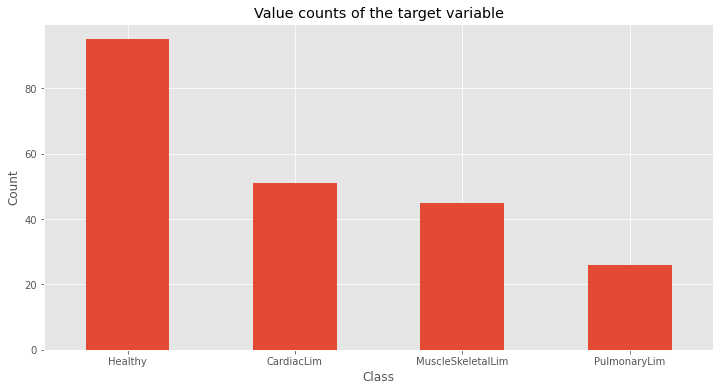

In [34]:
df['Class'].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

<ipython-input-35-828cb5679838>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


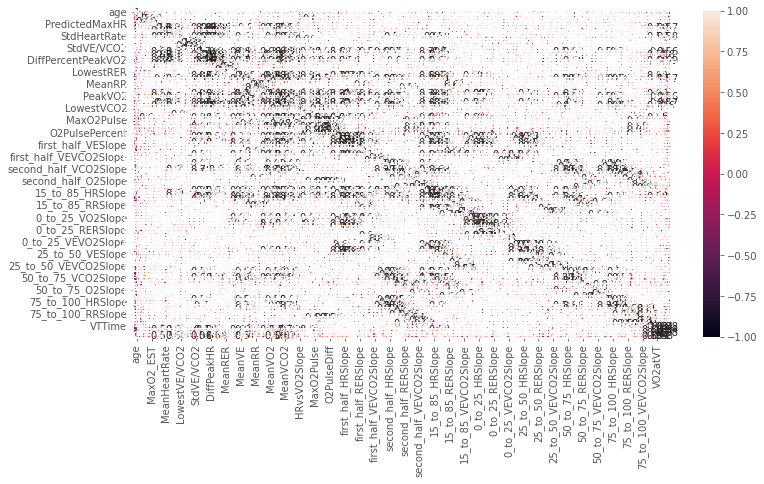

In [35]:
# Relationships of variables

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()